# Import Libraries and necessary Machine Learning Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Import Dataset 

In [2]:
df=pd.read_csv("heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [5]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [7]:
df.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Histogram

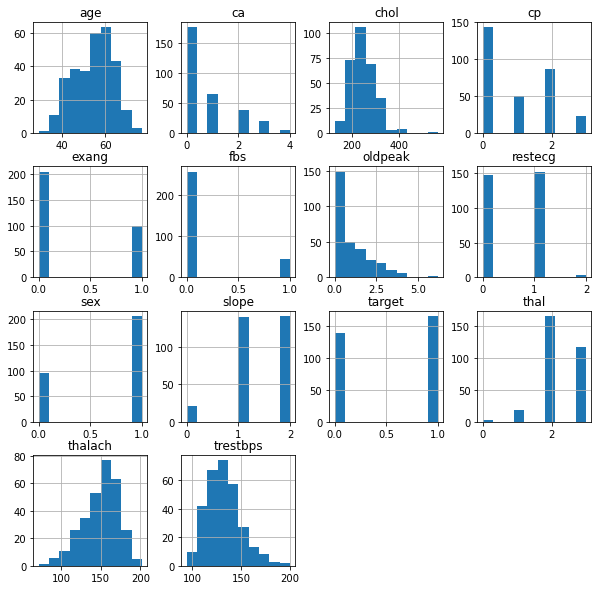

In [9]:
df.hist(figsize=(10,10))
plt.show()


# Bar Graph

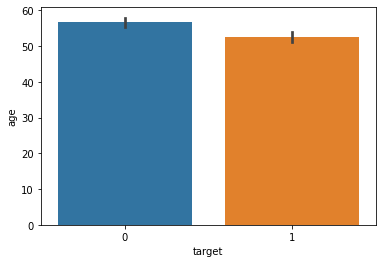

In [13]:
sns.barplot(df["target"],df['age'])


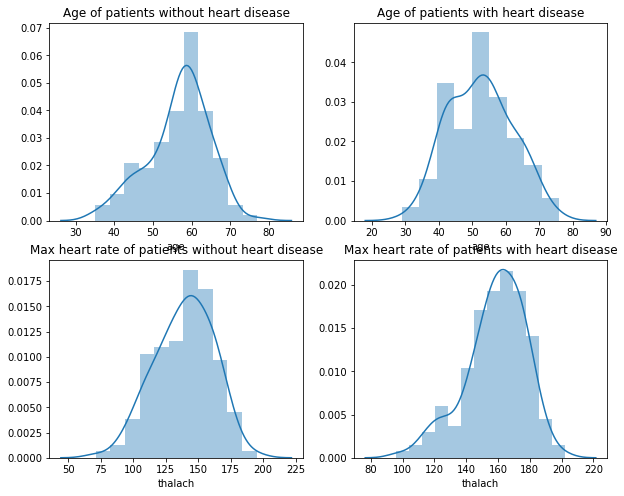

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

# Heat Map

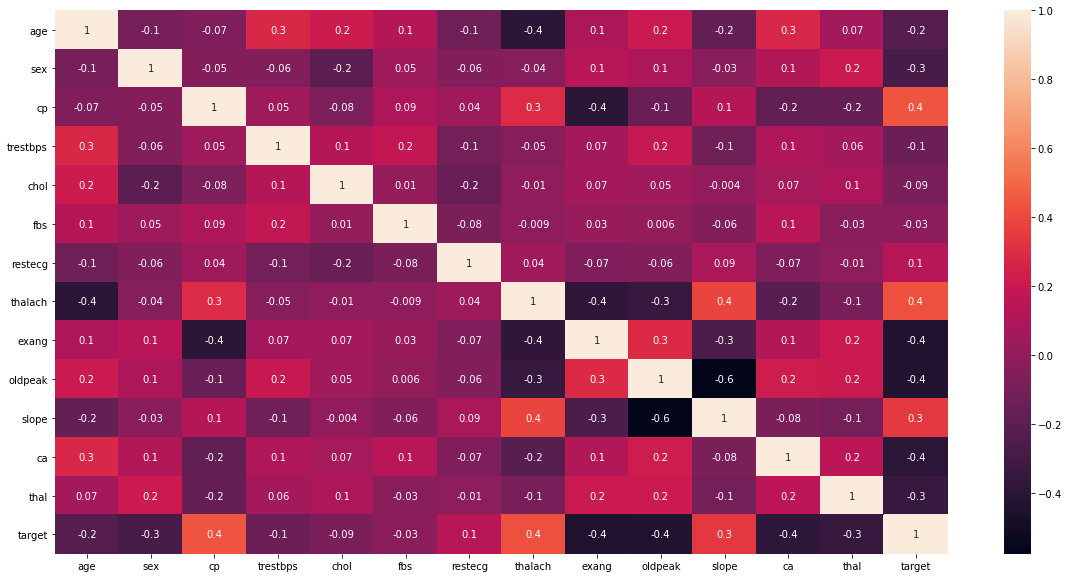

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),fmt='.1g',annot = True)

# Data Processing

In [18]:
x = df.drop(['target'],axis = 'columns')
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y=df["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Split the Data

In [21]:
#75% into training data set and 25% into test data set 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Feature Scaling


In [ ]:
#scale the values in the data to be values between 0 and 1
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [35]:
x_test


array([[ 1.67906782,  0.70243936, -0.91982712,  0.77497606, -1.35743293,
        -0.42695628,  0.89174012, -1.04934923,  1.38212026,  1.22827842,
        -2.27370441, -0.70736353,  1.12135917],
       [ 1.01581655,  0.70243936,  1.94045721,  2.22645762, -0.380682  ,
        -0.42695628, -0.9825655 ,  0.238927  , -0.72352604, -0.4269261 ,
        -0.6557392 , -0.70736353,  1.12135917],
       [ 0.46310716,  0.70243936,  1.94045721,  2.22645762,  0.74350304,
        -0.42695628, -0.9825655 ,  0.41069717, -0.72352604, -0.757967  ,
        -0.6557392 , -0.70736353,  1.12135917],
       [ 0.57364904,  0.70243936, -0.91982712, -0.38620919,  0.19062515,
        -0.42695628, -0.9825655 , -0.36226857,  1.38212026,  1.39379887,
        -0.6557392 ,  0.25993479,  1.12135917],
       [ 0.79473279,  0.70243936,  0.9870291 , -0.09591288, -0.30696495,
        -0.42695628,  0.89174012, -0.14755587, -0.72352604,  0.56619661,
        -0.6557392 ,  2.19453143,  1.12135917],
       [-0.75285349,  0.702439

In [24]:
print('Length of x_train=',len(x_train))
print('Length of y_train=',len(y_train))
print('Length of x_test=',len(x_test))
print('Length of y_test=',len(y_test))


Length of x_train= 227
Length of y_train= 227
Length of x_test= 76
Length of y_test= 76


# Random Forest

In [25]:
model1=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state =0)
#traning our data
model1.fit(x_train,y_train)
#Model accuracy on the training data set
model1.score(x_train,y_train)

0.986784140969163

In [29]:
#Model accuracy on the test data set
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,model1.predict(x_test))
TN=CM[0][0]
TP=CM[1][1]
FN=CM[1][0]
FP=CM[0][1]
#print the confusion matrix
print(CM)

#print the model accuracy on test dataset
print('Model test accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

[[24  9]
 [ 4 39]]
Model test accuracy=0.8289473684210527


# KNN

In [30]:
model2=KNeighborsClassifier(n_neighbors=10)
model2.fit(x_train,y_train)
#print the model accuracy on train dataset
model2.score(x_train,y_train)

0.8546255506607929

In [31]:
#print the model accuracy on test dataset
model2.score(x_test,y_test)

0.8552631578947368

In [32]:
#KNN
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

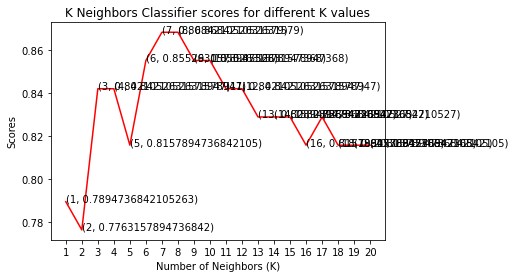

In [34]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
